# PROJECT 1 ENSEMBLE TECHINQUE 

**Importing Libraries**

In [2]:
import warnings
warnings.simplefilter('ignore')

In [6]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [7]:
#Import libraries from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import StandardScaler,minmax_scale,robust_scale
from sklearn.tree import DecisionTreeClassifier

In [8]:
#Importing required libraries from sklearn.ensemble

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
#Importing required libraries from sklearn.metrics

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

**Loading Dataset**

In [13]:
data = pd.read_csv("C:\Sharath\DATA SETS\PROJECT 1\\bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Exploratory Data Analysis**

In [18]:
#Checking data types in the dataframe 

data.dtypes.to_frame('Data Types').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Data Types,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [22]:
# Checking missing values

data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [24]:
# Describing the data

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


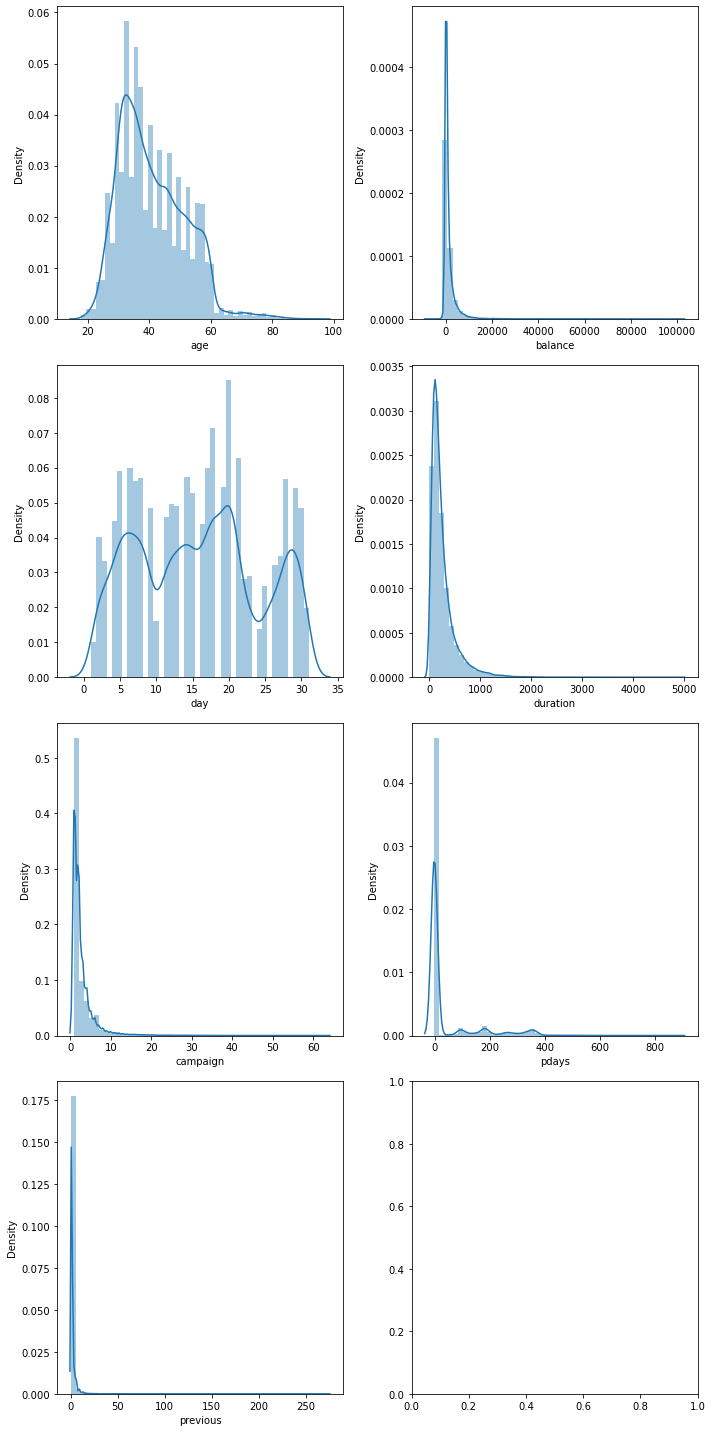

In [26]:
# Distribution of numerical data

fig,axe = plt.subplots(nrows=4,ncols=2,figsize=(10,20))
axe = axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

fig.tight_layout()
fig.show()

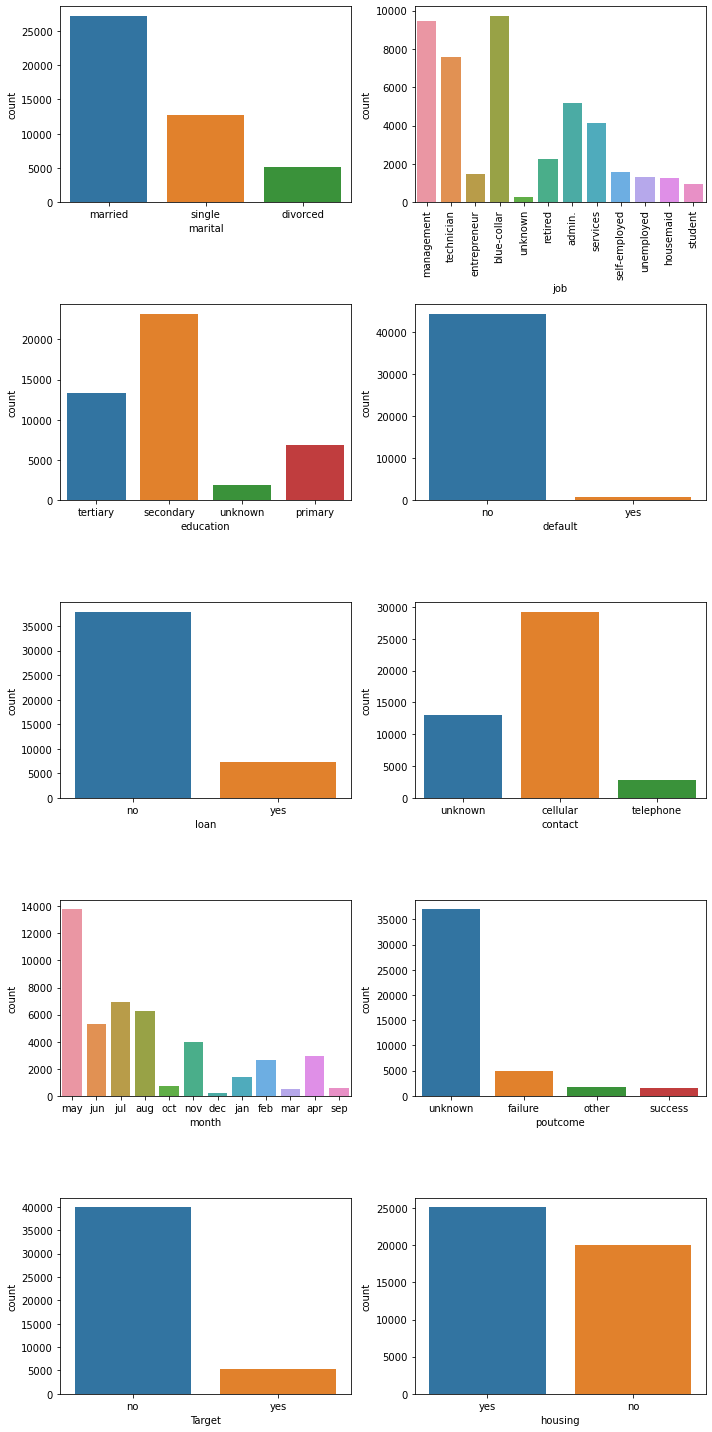

In [28]:
# Distribution of categorical data

fig,axe = plt.subplots(nrows=5,ncols=2,figsize=(10,20))
axe = axe.flatten()
sns.countplot(data['marital'],ax=axe[0])
plot = sns.countplot(data['job'],ax=axe[1])
plt.setp(plot.get_xticklabels(),rotation=90)
sns.countplot(data['education'],ax=axe[2])
sns.countplot(data['default'],ax=axe[3])
sns.countplot(data['loan'],ax=axe[4])
sns.countplot(data['contact'],ax=axe[5])
sns.countplot(data['month'],ax=axe[6])
sns.countplot(data['poutcome'],ax=axe[7])
sns.countplot(data['Target'],ax=axe[8])
sns.countplot(data['housing'],ax=axe[9])

fig.tight_layout()
fig.show()

Skewness :
1. If Skewness is less than 1 or greater than 1 then the distribution is highly skewed.
2. If skewness is between -1 and 0.5 or between 0.5 and 1 then the distribution is moderate.
3. If skewness is -0.5 and 0.5 then the distribution is approx symmetric.

Kurtosis:
1. Kurtosis value is exactly 3, Normal distribution.
2. Kurtosis value is <3 , Central peak is lower.
3. Kurtosis value is >3, Central peak is higher and sharper, Its tail are longer and fatter.

In [35]:
# Measure the skewness and kurtosis of numerical feature
print('Skewness :\n',data.skew())
print()
print('Kurtosis :\n',data.kurtosis())

Skewness :
 age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Kurtosis :
 age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64


In [37]:
# Converting categorical data to numerical data by using LabelEncoding

from sklearn.preprocessing import LabelEncoder
df = data.copy()
encoder = LabelEncoder()

df['default'] = encoder.fit_transform(df['default']).astype('int')
df['marital'] = encoder.fit_transform(df['marital']).astype('int')
df['loan'] = encoder.fit_transform(df['loan']).astype('int')
df['housing'] = encoder.fit_transform(df['housing']).astype('int')
df['Target'] = encoder.fit_transform(df['Target']).astype('int')
df['month'] = encoder.fit_transform(df['month']).astype('int')
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype('int')
df['education'] = encoder.fit_transform(df['education']).astype('int')
df['job'] = encoder.fit_transform(df['job']).astype('int')
df['contact'] = encoder.fit_transform(df['contact']).astype('int')

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Model Building : 

# Logistic Regression :


In [39]:
# Assigning features and target into specified variables

x = df.drop('Target',axis=1)
y = df['Target']

In [50]:
# Split the records for training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,
                                             random_state=1)

In [51]:
# Scale the data
scaled = StandardScaler()
x_train = scaled.fit_transform(xtrain)
x_test = scaled.transform(xtest)

In [53]:
#Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train,ytrain)
ypred = log_reg.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred))
print('\n The Classification Report \n',classification_report(ytest,ypred))


The Accuracy score
 0.8910350928929519

 The Confusion matrix 
 [[11758   255]
 [ 1223   328]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



# Naive Bayes :

In [55]:
# Navie Bayes

naive = GaussianNB()
naive.fit(x_train,ytrain)
ypred_naive = log_reg.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_naive))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_naive))
print('\n The Classification Report \n',classification_report(ytest,ypred_naive))


The Accuracy score
 0.8910350928929519

 The Confusion matrix 
 [[11758   255]
 [ 1223   328]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



# Decision Tree

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,ytrain)
ypred_dtree = dtree.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_dtree))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_dtree))
print('\n The Classification Report \n',classification_report(ytest,ypred_dtree))


The Accuracy score
 0.872309053376585

 The Confusion matrix 
 [[11127   886]
 [  846   705]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.44      0.45      0.45      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



# Ensembling Techniques : 

**Bagging** 

In [59]:
bagc = BaggingClassifier(base_estimator=dtree,n_estimators=10,random_state=0)
bagc.fit(x_train,ytrain)
ypred_bagc = bagc.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_bagc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_bagc))
print('\n The Classification Report \n',classification_report(ytest,ypred_bagc))


The Accuracy score
 0.8992185196107343

 The Confusion matrix 
 [[11558   455]
 [  912   639]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     12013
           1       0.58      0.41      0.48      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.69      0.71     13564
weighted avg       0.89      0.90      0.89     13564



**Boosting : Adaboost**

In [61]:
adac = AdaBoostClassifier(base_estimator=dtree,n_estimators=20,random_state=0)
adac.fit(x_train,ytrain)
ypred_adac = adac.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_adac))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_adac))
print('\n The Classification Report \n',classification_report(ytest,ypred_adac))


The Accuracy score
 0.871129460336184

 The Confusion matrix 
 [[11111   902]
 [  846   705]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     12013
           1       0.44      0.45      0.45      1551

    accuracy                           0.87     13564
   macro avg       0.68      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



 **Boosting : Gradient**

In [64]:
gradc = GradientBoostingClassifier(n_estimators=20,random_state=0)
gradc.fit(x_train,ytrain)
ypred_gradc = gradc.predict(x_test)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_gradc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_gradc))
print('\n The Classification Report \n',classification_report(ytest,ypred_gradc))


The Accuracy score
 0.8956797404895311

 The Confusion matrix 
 [[11837   176]
 [ 1239   312]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     12013
           1       0.64      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

